<a href="https://colab.research.google.com/github/Chinhan1532/AI_Class/blob/main/AI_W9_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [2]:

print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


so hinh la: [2]


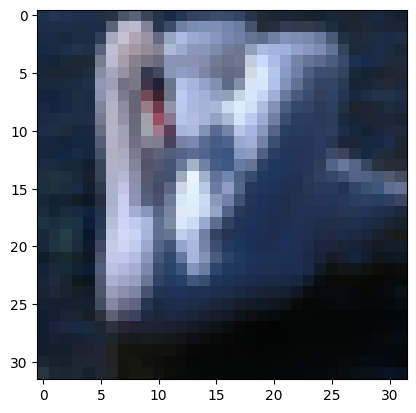

In [3]:
digit=x_train[1532]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('so hinh la:',y_train[1532])

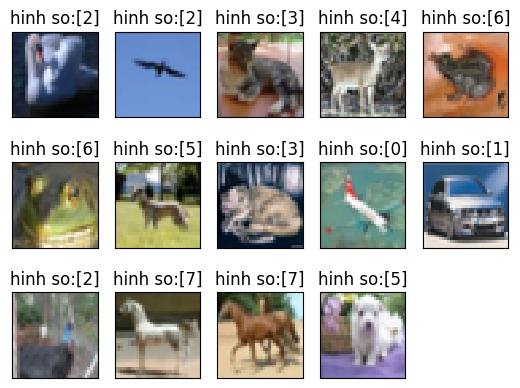

In [4]:
for i in range(14):
   plt.subplot(3,5,i+1)
   plt.tight_layout
   plt.imshow(x_train[i+1532],cmap='gray',interpolation='none')
   plt.title( 'hinh so:{}'.format(y_train[i+1532]))
   plt.xticks([])
   plt.yticks([])

In [5]:
from keras.models import Sequential #Senquential  mo ta ANN theo tuan tu cac lop #ke tiep lien tuc nhau
from keras.layers import Dense      #Dense=full_connected( su ket noi daydu)  
model = Sequential()    
model.add(Dense(5000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(5000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(5000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              15365000  
                                                                 
 dense_1 (Dense)             (None, 5000)              25005000  
                                                                 
 dense_2 (Dense)             (None, 5000)              25005000  
                                                                 
 dense_3 (Dense)             (None, 10)                50010     
                                                                 
Total params: 65,425,010
Trainable params: 65,425,010
Non-trainable params: 0
_________________________________________________________________


In [6]:
x_train = x_train.reshape((50000,32*32*3))  #chỉnh lại kích thước số dữ liệu đầu vào 
x_train = x_train.astype('float32')/255   #chuyển qua float để có thể chia được (dữ liệu từ 0->1)

x_test = x_test.reshape((10000,32*32*3))  
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [7]:
from keras.utils import to_categorical    #to_categorical: chuyển từ 1 bit thành nhiều bit đầu ra 
y_train = to_categorical(y_train,10)  #từ 1 bit thành 10 bit
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [8]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  #Đánh giá sự mất mát (loss)
              metrics=['accuracy']) #Đo lường độ chính xác (metrics)
model.fit(x_train,y_train,epochs=10,batch_size=128)   #10 lần học, mỗi lần học 128 lần ngẫu nhiên
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)
     

Epoch 1/10
391/391 [==============================] - 791s 2s/step - loss: 2.5063 - accuracy: 0.2171
Epoch 2/10
391/391 [==============================] - 853s 2s/step - loss: 1.8642 - accuracy: 0.3255
Epoch 3/10
391/391 [==============================] - 858s 2s/step - loss: 1.7671 - accuracy: 0.3662
Epoch 4/10
391/391 [==============================] - 852s 2s/step - loss: 1.6923 - accuracy: 0.3927
Epoch 5/10
391/391 [==============================] - 856s 2s/step - loss: 1.6312 - accuracy: 0.4166
Epoch 6/10
391/391 [==============================] - 844s 2s/step - loss: 1.5800 - accuracy: 0.4313
Epoch 7/10
391/391 [==============================] - 845s 2s/step - loss: 1.5386 - accuracy: 0.4507
Epoch 8/10
391/391 [==============================] - 846s 2s/step - loss: 1.4968 - accuracy: 0.4618
Epoch 9/10
391/391 [==============================] - 849s 2s/step - loss: 1.4607 - accuracy: 0.4762
Epoch 10/10
313/313 [==============================] - 39s 124ms/step - loss: 1.6105 - accu

In [9]:
model.save('test.h5')

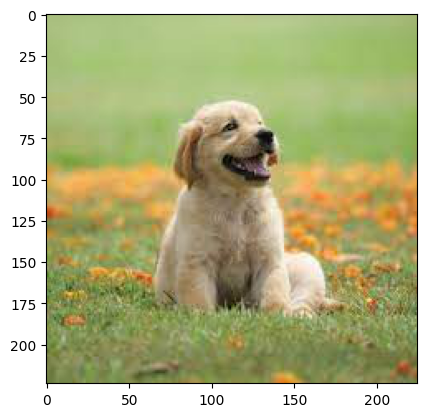

In [10]:

img=plt.imread('/content/cho.jpg')
plt.imshow(img)
plt.show()

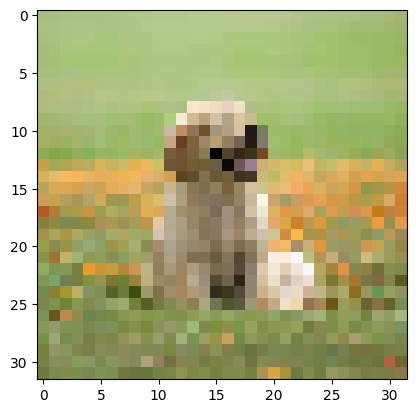

In [12]:
from keras.utils import load_img, img_to_array
img = load_img("/content/cho.jpg", target_size=(32,32))
plt.imshow(img)

In [13]:
import numpy as np
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 183ms/step


array([4])

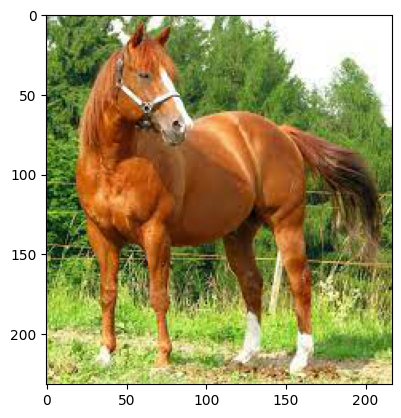

In [17]:
img=plt.imread('/content/ngua1.jpg')
plt.imshow(img)
plt.show()

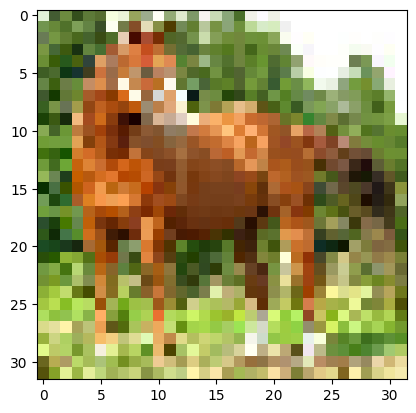

In [18]:
from keras.utils import load_img, img_to_array
img = load_img("/content/ngua1.jpg", target_size=(32,32))
plt.imshow(img)

In [19]:
import numpy as np
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 55ms/step


array([7])